# Data Science Salaries - (Preprocessing & EDA) & Predictions

# 1. About Dataset 📁:

The dataset, titled 'Data Science Job Salaries', encapsulates vital information about salaries in data science roles across various parameters. The dataset is organized into 11 columns, each offering distinct insights. Here is a brief overview of each:

a. work_year: This feature records the year in which the salary was paid, thus providing a timeline for our data.

b. experience_level: This categorical feature signifies the experience level of the employee in their job during that year, categorized as Junior, Intermediate, Senior, or Executive.

c. employment_type: This feature indicates the type of employment for the role such as Full-Time, Part-Time, Contract, or Freelance.

d. job_title: This feature represents the role or position held by the employee during that year.

e. salary: This is the total gross salary amount paid to the employee for that year, in the original currency.

f. salary_currency: This feature provides the ISO 4217 code of the currency in which the salary was paid.

g. salary_in_usd: The salary converted to United States Dollars (USD) for standardization and comparability.

h. employee_residence: This feature records the employee's primary country of residence during the work year, encoded as an ISO 3166 country code.

i. remote_ratio: This feature provides a quantifiable measure of the overall amount of work done remotely by the employee.

j. company_location: This denotes the country where the employer's main office or contracting branch is located, represented as an ISO 3166 country code.

k. company_size: This feature indicates the median number of people that worked for the company during the year, providing insights into the scale of the organization.

💡 By analyzing this dataset, we aim to glean valuable insights into salary trends, impact of experience and role on earnings, and influence of company size and location on remuneration in the field of data science.



# 2. Notebook Objectives 🔎

1. 🥷 Explore every feature in dataset.
2. 🕵🏾‍♀️ Work Year analysis with respect to salary, and remote ratio
3. 👨🏾‍💻 Experience Level analysis with respect to Employment Type, Top 5 Job Titles, and Company Size
4. ⚓ Company Location Analysis with respect to Experience Level
5. 💰 Salary Analysis with respect to Work Year, Experience Level, Company Size, Job Title, Company Location, and Remote Ratio



# 3. Import Necessary Libraries ✅

In [1]:
#install
!pip3 install country_converter
!pip3 install missingno

# libraries for Data Manipulation
import pandas as pd
import numpy as np
import country_converter as coco

# libraies for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.colors as colors
import matplotlib.colors as mcolors
import missingno as msno
import plotly.figure_factory as ff

# libraries for Machine Learning
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import nltk

from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

# styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.6 MB/s eta 0:00:00


<ipython-input-1-fba866a8f382>:41: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


# 4. Load and Clean Data 📡

In [6]:
df = pd.read_csv('/content/ds_salaries.csv')
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# 4.1. Find duplicate records 💀


In [7]:
df.duplicated().sum()


0

No Duplicate records found

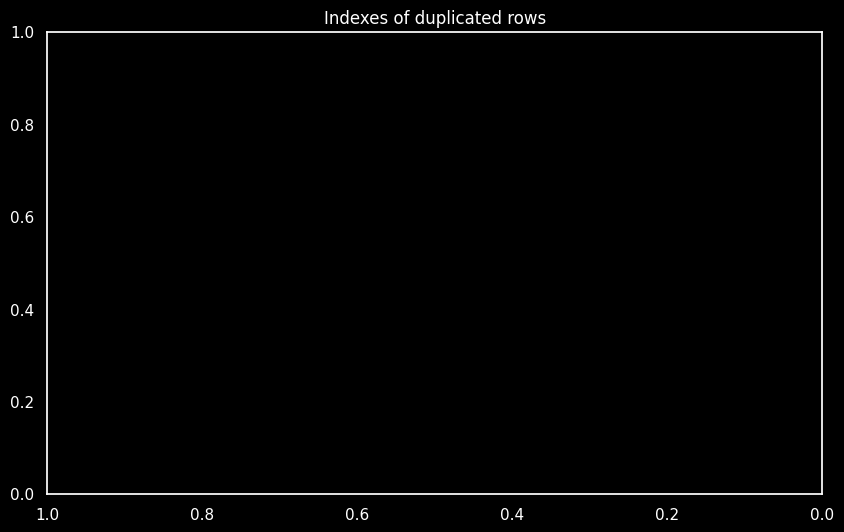

In [8]:
# Identify the duplicate rows
duplicated_rows = df.duplicated()

# Create a new DataFrame to store row number and whether it's duplicated
duplicates_df = pd.DataFrame({
    'Row': range(1, len(df) + 1),
    'Duplicated': duplicated_rows
})

# Filter to only duplicated rows
duplicates_df = duplicates_df[duplicates_df['Duplicated']]

# Plot duplicated rows as black lines
plt.figure(figsize=(10, 6))
plt.vlines(x=duplicates_df['Row'], ymin=0, ymax=1, color='black')
plt.gca().invert_xaxis()  # reverse the x-axis
plt.title("Indexes of duplicated rows")
plt.show()

# 4.2. Drop unnecessary features💧


In [9]:
# Let's drop Unnamed: 0, salary, and salary currency
df.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis=1, inplace=True)


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


# 4.3. Find missing values💔


In [11]:
# Looking for missing values
df.isna().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Text(0.5, 1.0, 'Distribution of Missing Values')

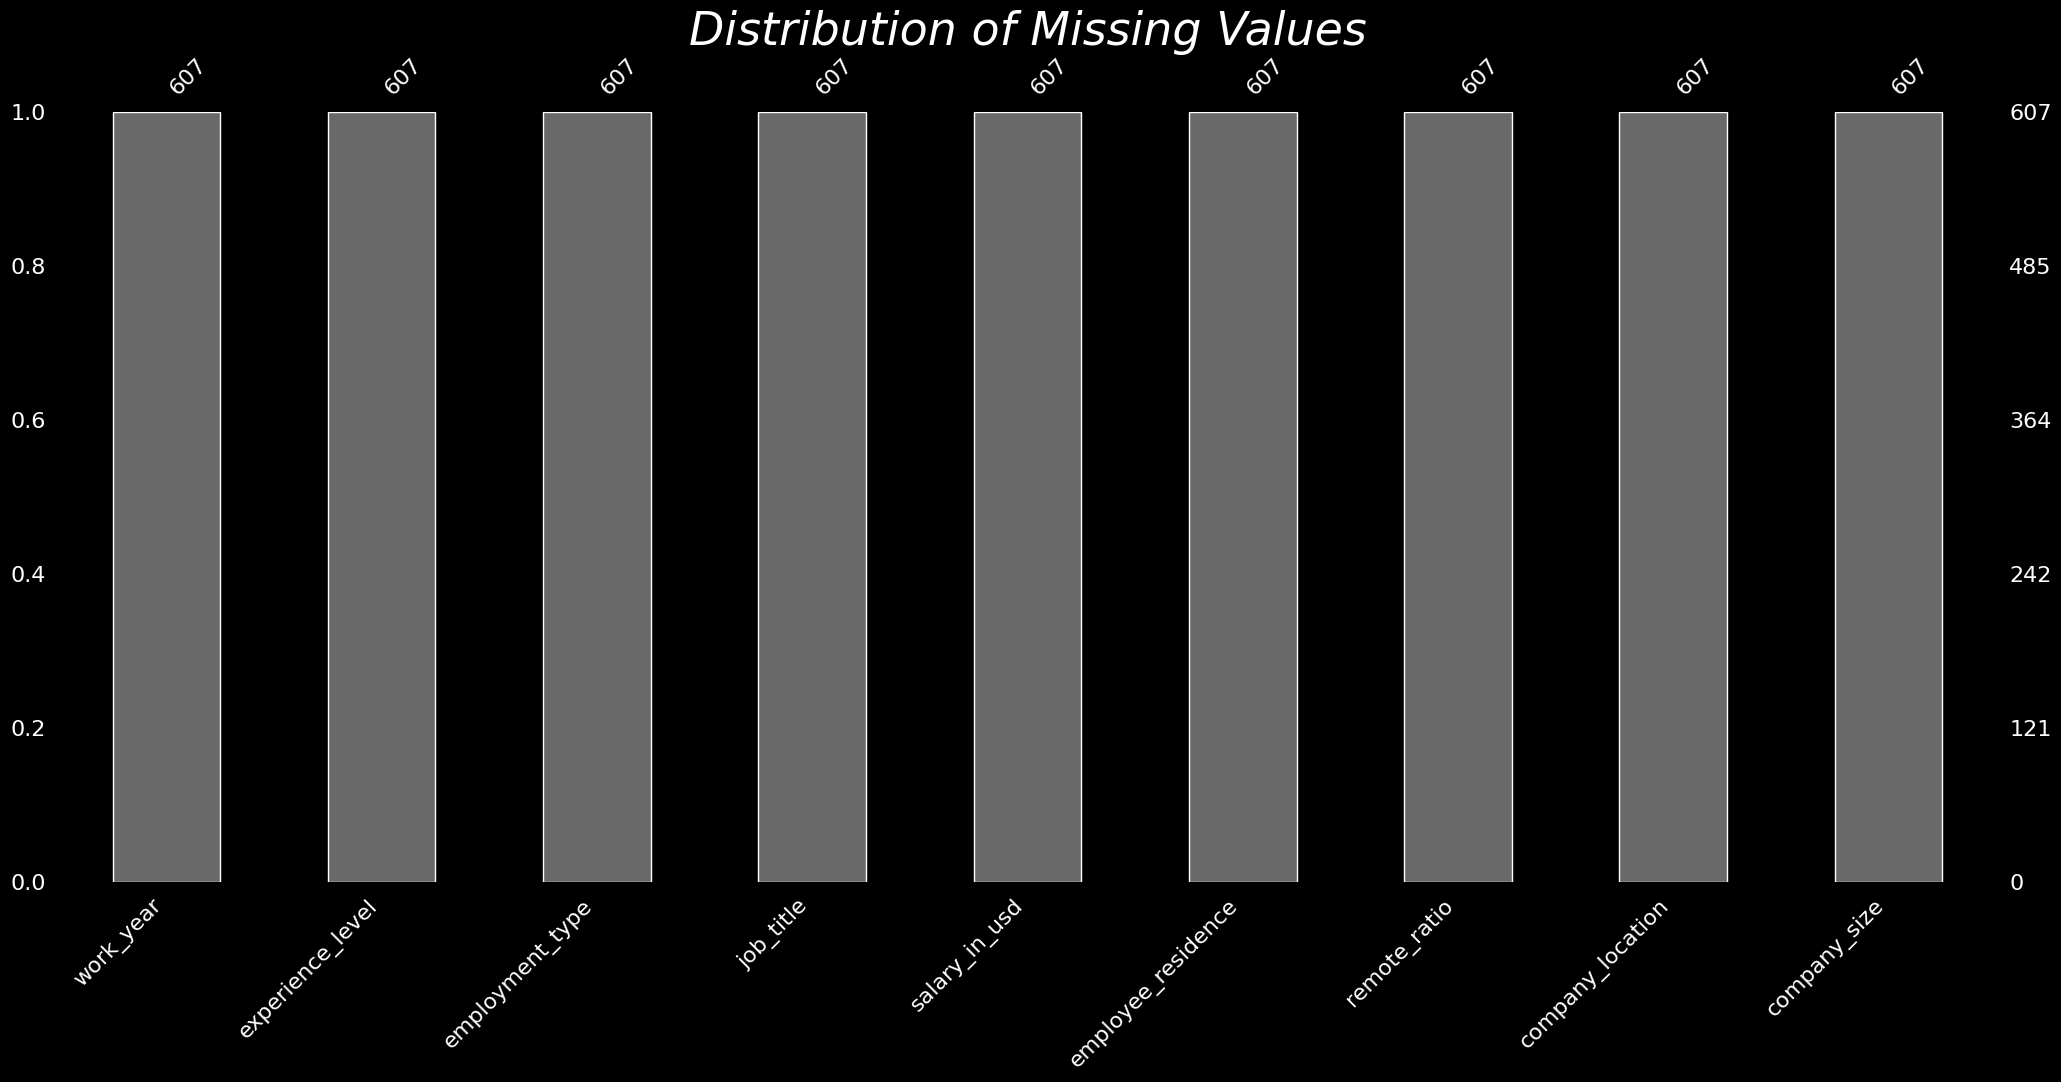

In [15]:
msno.bar(df)
plt.title('Distribution of Missing Values', fontsize=33, fontstyle='oblique')


It is clear, there are no missing values in the dataset.


# 5. Univariate Analysis of each Feature (Categorical & Numeric) 📊

Let's explore our dataset! We have two types of features: categorical and numerical.

For categorical features, we'll examine their distributions to discover patterns and gain insights into the different groups or classes they represent.

With numerical features, we'll explore their distributions to uncover trends, variations, and important statistics that reveal valuable information about our data.

By diving into each feature, we'll unveil intriguing stories and valuable insights, setting the stage for further analysis. Join me on this adventure as we uncover the secrets within our dataset!


In [16]:
def summarize_dataframe(df):
    print(f"\nThere are {len(df)} records and {len(df.columns)} features/columns/attributes")

    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

    print(f"\nThere are {len(numeric_features)} numerical attributes: \n")
    for i, feature in enumerate(numeric_features, 1):
        print(f"{i}. {feature}\n")

    print(f"\nThere are {len(categorical_features)} categorical attributes: \n")
    for i, feature in enumerate(categorical_features, 1):
        print(f"{i}. {feature} \n")


In [17]:
# Let's see what our features look like
summarize_dataframe(df)



There are 607 records and 9 features/columns/attributes

There are 3 numerical attributes: 

1. work_year

2. salary_in_usd

3. remote_ratio


There are 6 categorical attributes: 

1. experience_level 

2. employment_type 

3. job_title 

4. employee_residence 

5. company_location 

6. company_size 



# 5.1. Categorical Column: Experience Level 🧟


In [19]:
set(df['experience_level'].unique())


{'EN', 'EX', 'MI', 'SE'}

There're 4 abbreviated categorical values for the experience level column

1. EN - Entry-Level/Junior
2. MI - Mid-Level/Intermediate
3. SE - Senior-Level/Expert
4. EX - Executive-Level/Director


In [20]:
import pandas as pd
import numpy as np
import plotly.express as px

df['experience_level'] = df['experience_level'].replace({'EN': 'Entry-level/Junior',
                                                        'MI': 'Mid-level/Intermediate',
                                                        'SE': 'Senior-level/Expert',
                                                        'EX': 'Executive-level/Director'})

ex_level = df['experience_level'].value_counts()

fig = px.treemap(ex_level,
                 path=[ex_level.index],
                 values=ex_level.values,
                 title='Experience Level',
                 color=ex_level.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
                 width=1000, height=500)

percents = np.round((100 * ex_level.values / sum(ex_level.values)).tolist(), 2)
fig.data[0].customdata = [35.09, 46.13, 4.28, 14.5]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(
    font=dict(size=19, family="Franklin Gothic"))

fig.show()

Based on the provided Treemap graph, we can conclude that the dataset primarily consists of professionals with entry-level/junior and mid-level/intermediate experience. The number of senior-level/expert and executive-level/director professionals is relatively lower in comparison.

# 5.2. Categorical Column: Job Titles 👔


In [21]:
df['job_title'].value_counts()


Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

📌 Observation: The 'job_title' column in the dataset showed a high level of granularity, with numerous job titles representing similar roles, making analysis challenging.

💡 Inference: To overcome this challenge, we created a mapping to group similar job titles into broader categories. This approach consolidated job roles, allowing for clearer and more effective analysis.


In [22]:
# mapping the new classification type
employment_classification = {
    'Data Scientist':'Data Scientist',
    'Principal Data Scientist':'Data Scientist',
    'Applied Data Scientist':'Data Scientist',
    'Staff Data Scientist':'Data Scientist',
    'Lead Data Scientist':'Data Scientist',
    'Product Data Scientist':'Data Scientist',
    'Data Specialist':'Data Scientist',
    'Data Science Consultant': 'Data Scientist',

    'Data Science Manager':'Data Science Manager',
    'Head of Data Science':'Data Science Manager',
    'Director of Data Science':'Data Science Manager',
    'Data Scientist Lead':'Data Science Manager',
    'Data Science Lead':'Data Science Manager',
    'Head of Data': 'Data Science Manager',

    'Data Analyst':'Data Analyst',
    'Business Data Analyst':'Data Analyst',
    'BI Data Analyst':'Data Analyst',
    'Lead Data Analyst':'Data Analyst',
    'Data Analytics Engineer':'Data Analyst',
    'Marketing Data Analyst':'Data Analyst',
    'Financial Data Analyst':'Data Analyst',
    'Finance Data Analyst':'Data Analyst',
    'Principal Data Analyst':'Data Analyst',
    'Data Operations Analyst':'Data Analyst',
    'Power BI Developer':'Data Analyst',

    'Data Analytics Manager':'Data Analytics Manager',
    'Data Analytics Lead':'Data Analytics Manager',
    'Analytics Engineer':'Data Analytics Manager',
    'Data Analytics Consultant':'Data Analytics Manager',
    'Product Data Analyst':'Data Analytics Manager',

    'Data Engineer':'Data Engineer',
    'Big Data Engineer':'Data Engineer',
    'Principal Data Engineer':'Data Engineer',
    'Data Operations Engineer':'Data Engineer',
    'Lead Data Engineer':'Data Engineer',
    'ETL Developer':'Data Engineer',
    'Data Science Engineer': 'Data Engineer',

    'Data Engineering Manager':'Data Engineering Manager',
    'Director of Data Engineering':'Data Engineering Manager',
    'Cloud Data Engineer':'Data Engineering Manager',
    'Data Science Tech Lead':'Data Engineering Manager',
    'Data Manager':'Data Engineering Manager',

    'Machine Learning Scientist':'Machine Learning Scientist',
    'Applied Machine Learning Scientist':'Machine Learning Scientist',
    'Machine Learning Research Engineer':'Machine Learning Scientist',

    'Head of Machine Learning':'ML Manager',
    'Machine Learning Manager':'ML Manager',

    'Machine Learning Engineer':'Machine Learning Engineer',
    'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
    'ML Engineer':'Machine Learning Engineer',
    'Lead Machine Learning Engineer':'Machine Learning Engineer',
    'Machine Learning Developer':'Machine Learning Engineer',

    'Data Architect':'Data Architect',
    'Cloud Data Architect':'Data Architect',
    'Principal Data Architect':'Data Architect',
    'Big Data Architect':'Data Architect',

    'Computer Vision Engineer':'Computer Vision Engineer',
    'Computer Vision Software Engineer':'Computer Vision Engineer',
    '3D Computer Vision Researcher':'Computer Vision Engineer',

    'NLP Engineer':'NLP Engineer',
    'AI Scientist':'AI Scientist',
    'Research Scientist':'Research Scientist',
    'Applied Scientist':'Applied Scientist',
}

df['job_title'] = df['job_title'].map(employment_classification)


Text(0.5, 1.0, 'Distribution of Missing Values')

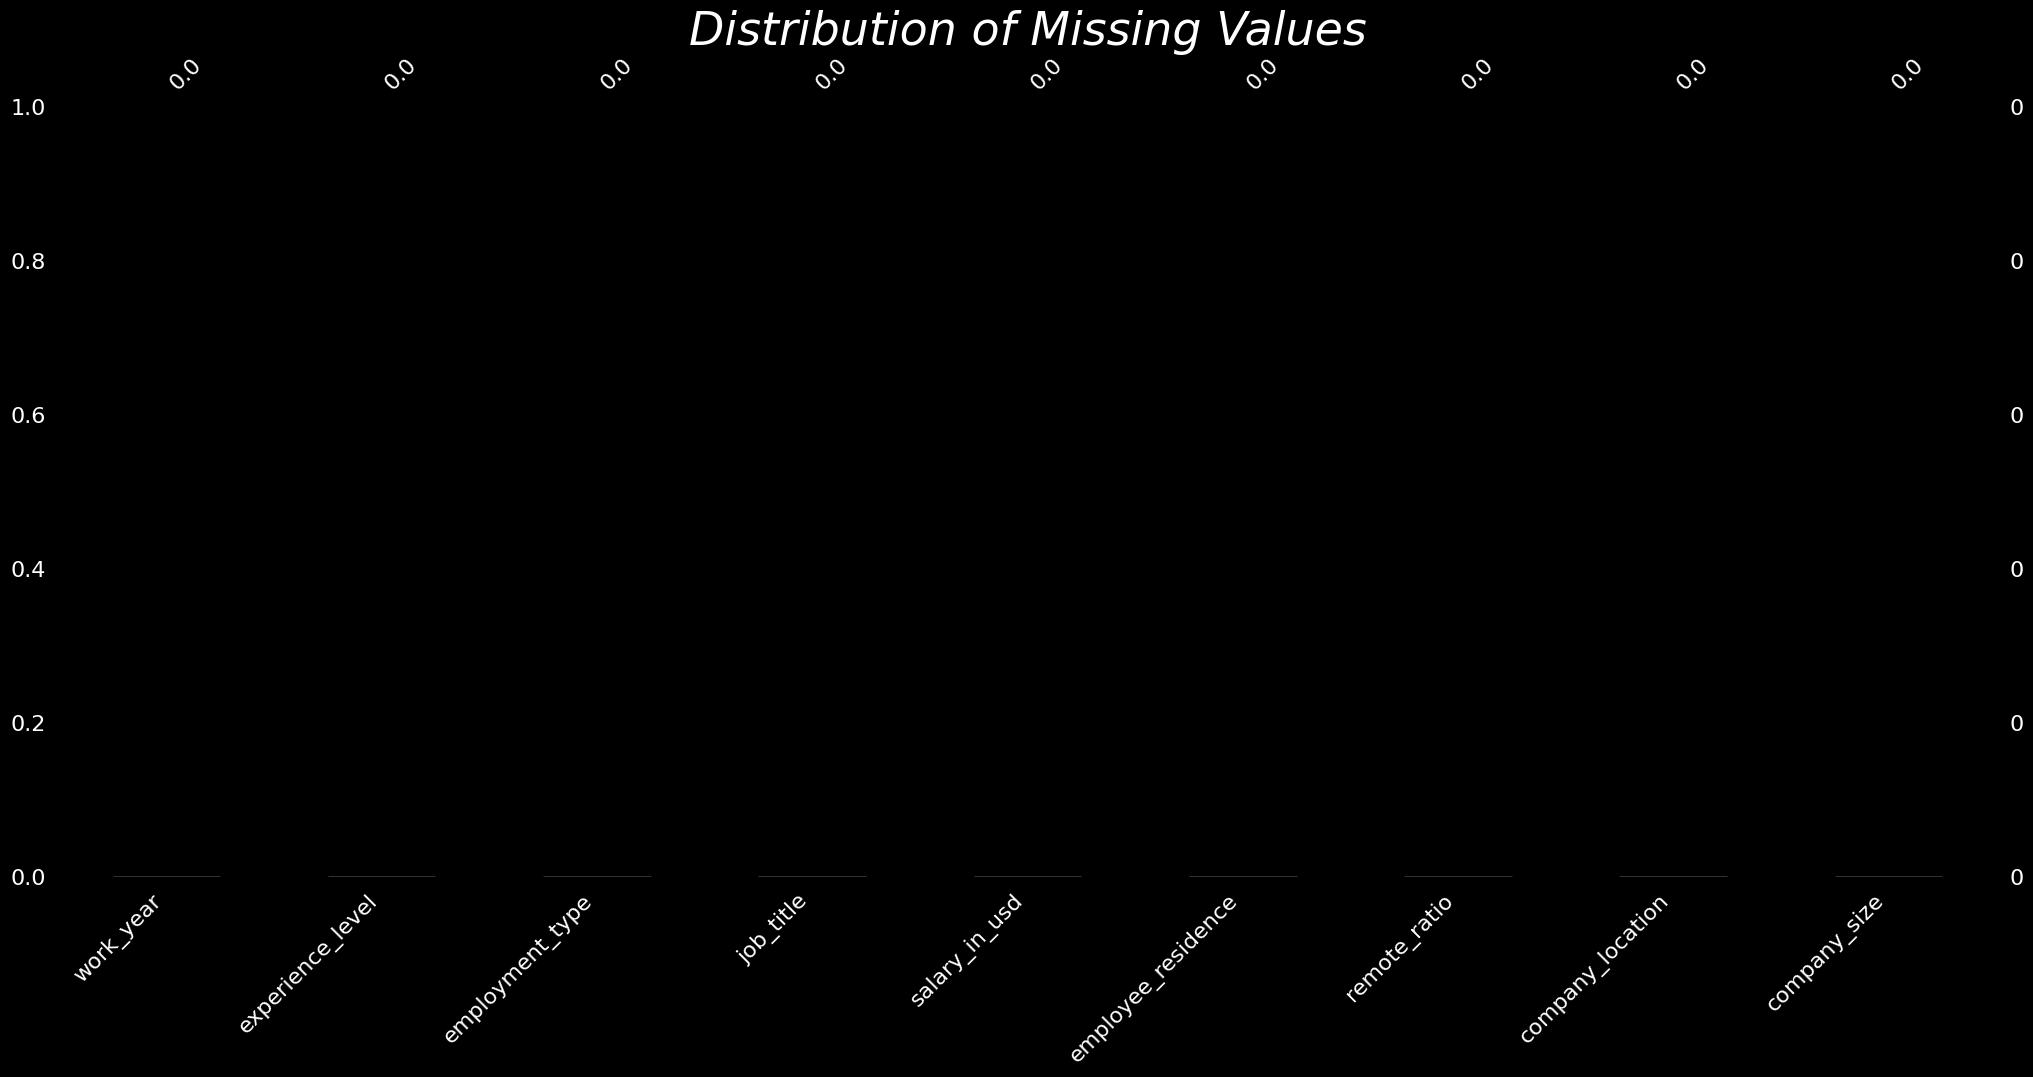

In [23]:
# Rows where 'job_title' is an empty string
missing_job_titles = df[df['job_title'].isna()]

msno.bar(missing_job_titles)
plt.title('Distribution of Missing Values', fontsize=33, fontstyle='oblique')


It is clear, there are no missing records in the mapping

In [24]:

top10_job_title = df['job_title'].value_counts()[:10]

fig = px.bar(top10_job_title,
             x=top10_job_title.index,
             y=top10_job_title.values,
             color=top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title='Top 10 Job Titles',
             template='plotly_dark')

fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="Count",
    font=dict(size=17, family="Franklin Gothic"))

fig.show()


In [25]:
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame({'Frequency': Freq_dist_nltk.values()}, index=Freq_dist_nltk.keys())
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by='Frequency', ascending=False).reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize=(20, 15))
    wc = WordCloud(width=1200, height=600, max_words=50, colormap=colormap,
                   max_font_size=100, random_state=88, background_color=color_background)
    wc.generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()


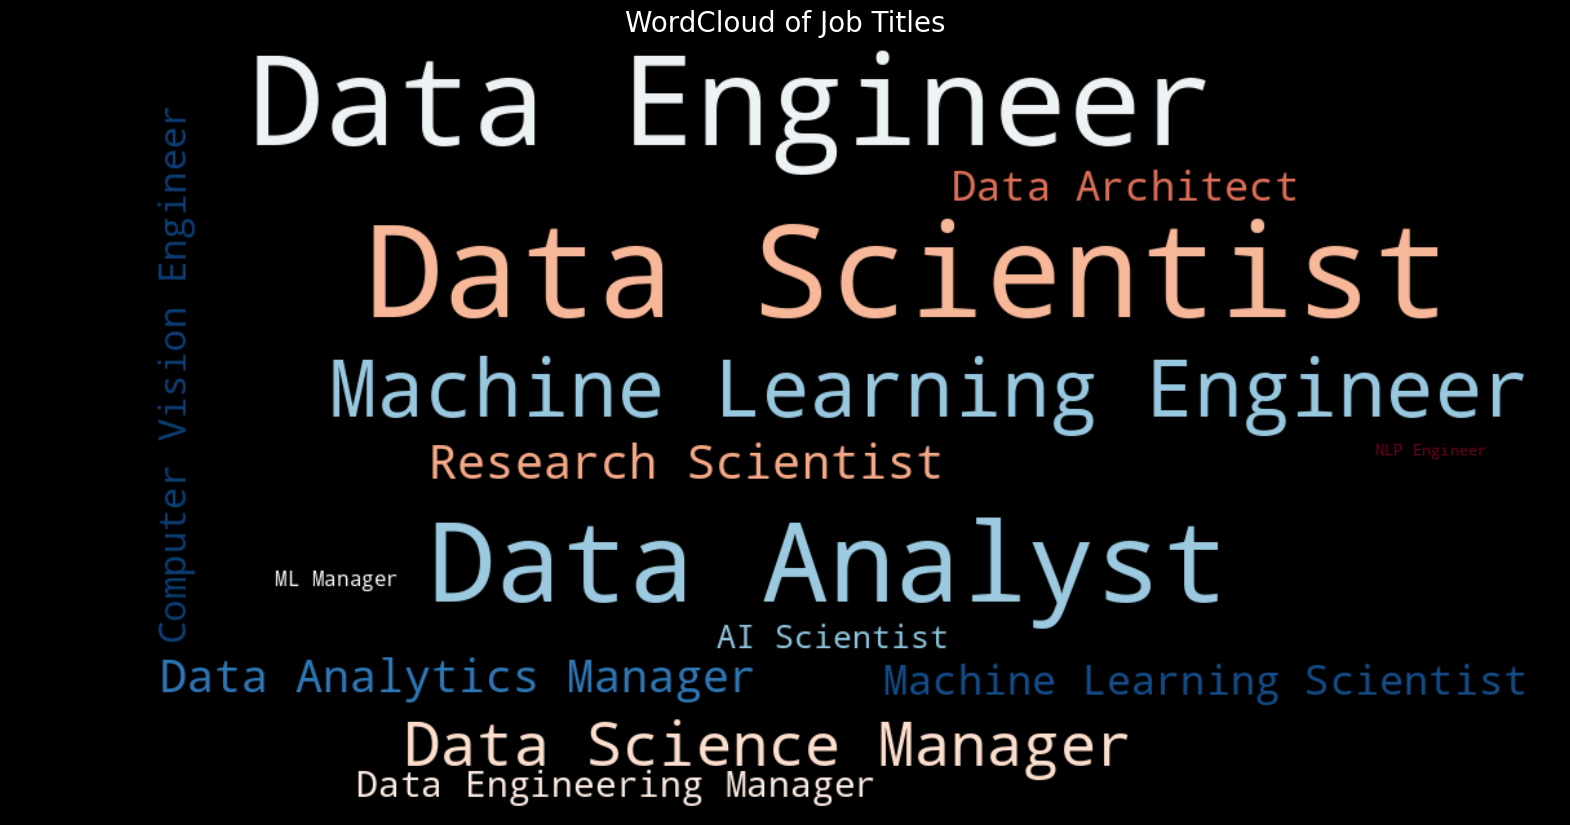

In [26]:
freq_df = Freq_df(df['job_title'].values.tolist())
data = freq_df.set_index('Term')['Frequency'].to_dict()

Word_Cloud(data, 'black', 'RdBu', 'WordCloud of Job Titles')


📌 Observation

Data Scientist roles are the most common (167 instances), followed by Data Engineer (154 instances) and Data Analyst (121 instances). Machine Learning roles are less common, while managerial roles and specialized positions like Computer Vision Engineer and AI Scientist are even rarer.

💡 Inference

The prevalence of Data Scientist roles suggests a significant presence in the data science job market. The demand for Data Engineers and Data Analysts reflects their crucial roles in data handling and analysis. Less common positions like Machine Learning Engineer and specialized roles may require more specific skills. Managerial roles and specialized positions indicate a smaller market or higher skill requirements.

Keep in mind that this distribution is influenced by the dataset and may not represent the entire job market accurately.

# 5.3. Categorical Column: Employment Type 👔


In [27]:
set(df['employment_type'].unique())


{'CT', 'FL', 'FT', 'PT'}

There're 4 abbreviated employment types:

1. CT: Contract
2. FL: Freelance
3. FT: Full-time
4. PT: Part-time


In [29]:
df['employment_type'] = df['employment_type'].replace(['PT', 'FT', 'CT', 'FL'], ['Part Time', 'Full Time', 'Contract', 'Freelance'])

type_grouped = df['employment_type'].value_counts()

fig = px.bar(x=['Part Time', 'Full Time', 'Contract', 'Freelance'], y=type_grouped.values,
             color=type_grouped.index, color_discrete_sequence=px.colors.sequential.PuBuGn,
             template='plotly_dark', text=type_grouped.values, title='Employment Type Distribution')
fig.update_layout(xaxis_title="Employment Type", yaxis_title="Count", font=dict(size=17, family="Franklin Gothic"), width=500)
fig.show()

In [30]:
df['employment_type'].value_counts()


Full Time    588
Part Time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64

📌 Observation

Full-time positions dominate the dataset, accounting for approximately 97% (588 out of 607 entries). This aligns with the industry norm, as full-time roles provide stability, allow for long-term projects, and foster deep company and data knowledge.

Part-time, contract, and freelance positions represent a small fraction (approximately 3%) of the total. This suggests that such employment arrangements are less common in the data science field within this dataset.

Part-time roles may be less prevalent due to the time-intensive nature of data science work, which requires extensive involvement in various tasks, from data preprocessing to model building and analysis.

Contract and freelance positions might be less common due to the need for consistent handling of sensitive data and maintaining data pipelines, which are better suited for full-time roles.

💡 Inference

These findings offer insights into the distribution of employment types within the dataset. However, it's important to consider that these trends may vary across the broader data science job market, as well as in different regions, industries, and company sizes. Additionally, employment type preferences can evolve over time.

# 5.4. Categorical Column: Company Location, and Employee Residence 📍

We'll explore the locations of the companies and employees by plotting map & bar charts.



In [31]:
# First let's get a feel of the locations
df['company_location'].value_counts()[:10]


US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
Name: company_location, dtype: int64

In [32]:
converted_country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = converted_country

company_locations_grouped = df['company_location'].value_counts()

fig = px.choropleth(locations=company_locations_grouped.index,
                    color=company_locations_grouped.values,
                    color_continuous_scale='YlGn',
                    template='plotly_dark',
                    title='Company Location Distribution Map')

fig.update_layout(font=dict(size=18, family="Franklin Gothic"))
fig.show()


Based on the visualization, it can be inferred that the majority of employers in the dataset are from the United States. This conclusion is drawn from the observation that the US has the highest concentration of company locations, as indicated by the highest color intensity on the choropleth map.

In [34]:
top_10_employer_location = company_locations_grouped[:10]
fig = px.bar(y=top_10_employer_location.values,
            x=top_10_employer_location.index,
            color=top_10_employer_location.index,
            color_discrete_sequence=px.colors.sequential.deep,
            text=top_10_employer_location.values,
            title='5.4.2 Top 10 Employer Locations',
            template='plotly_dark')
fig.update_layout(xaxis_title="Company Location",
                 yaxis_title="Frequency",
                 font=dict(size=17, family="Franklin Gothic"))
fig.show()

📌 Observation

United States Dominance: The dataset primarily consists of companies from the United States (355 companies), reflecting the country's strong presence in the tech industry and high demand for data science roles.

European Presence: Several European countries, including the UK (47 companies), Germany (28 companies), France (15 companies), and Spain (14 companies), also host a significant number of data science companies. This highlights the thriving tech sectors in these countries.

Emerging Markets: Emerging markets such as India (24 companies), China (2 companies), and Brazil (3 companies) show a growing presence of data science companies, indicating the expansion of the tech industry in these regions.

💡 Inference

These observations are based on the provided dataset and provide insights into the distribution of data science companies across different regions. However, it's important to note that the dataset might not fully represent the global distribution, and actual market trends may vary.

# 📌 Comparison: Employee Residence vs Employer Locations



In [35]:
converted_employee_residence_country = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence'] = converted_employee_residence_country
converted_employee_residence_country_count = df['employee_residence'].value_counts()
top_10_employee_residence = converted_employee_residence_country_count[:10]

fig = go.Figure(data=[
    go.Bar(name='Company Location',
           x=top_10_employer_location.index,
           y=top_10_employer_location.values,
           text=top_10_employer_location.values,
           marker_color='crimson'),
    go.Bar(name='Employee Residence',
           x=top_10_employee_residence.index,
           y=top_10_employee_residence.values,
           text=top_10_employee_residence.values,
           marker_color='white')
])

fig.update_layout(barmode='group',
                  xaxis_tickangle=-45,
                  title='Compare Company Location and Employee Residence',
                  template='plotly_dark',
                  font=dict(size=18, family="Franklin Gothic"))

fig.show()


📌 Observation

Same Country Residence: Countries like USA, GBR, CAN, DEU show a close match between employee residences and company locations, suggesting that most employees live in the same country as their company.

Remote Work or Cross-border Commuting: Countries like IND, FRA, ESP, GRC, JPN exhibit a slightly higher count of employee residences, indicating potential remote work or cross-border commuting scenarios.

Unique Cases: NLD has company locations but no listed employee residences, while PRT has employee residences but no listed company locations, suggesting remote work arrangements or data reporting inconsistencies.

💡 Inference

These observations highlight the global nature of the data science job market and the possibility of remote work. However, more granular data on work locations and commuting preferences would provide further insights.

# 5.5. Categorical Column: Company Size 🍩


In [36]:
df['company_size'].value_counts()


M    326
L    198
S     83
Name: company_size, dtype: int64

There're 3 abbreviated types of Company Sizes:

1. M: Medium
2. L: Large
3. S: Small


In [37]:
df['company_size'] = df['company_size'].replace(['L', 'M', 'S'], ['Large', 'Medium', 'Small'])

company_size_grouped = df['company_size'].value_counts()

fig = px.bar(x=company_size_grouped.index,
             y=company_size_grouped.values,
             color=company_size_grouped.index,
             color_discrete_sequence=px.colors.sequential.dense,
             text=company_size_grouped.values,
             title='Distribution of Company Size',
             template='plotly_dark')

fig.update_traces(width=0.5)
fig.update_layout(xaxis_title="Company Size",
                  yaxis_title="Frequency",
                  font=dict(size=18, family="Franklin Gothic"))

fig.show()

📌 Observation

Medium-sized companies dominate (326 roles), followed by large companies (198 roles), and small companies have the fewest roles (83).

💡 Inference

Job seekers in the data science field may find more opportunities in medium and large-sized companies. However, considering factors such as data maturity, team skills, and the company's understanding of data science's value is crucial in evaluating job opportunities.

# 6. Exploring Numeric Columns 🔢


In [38]:
df['work_year'].value_counts()


2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [39]:
work_year_count = df['work_year'].value_counts()

fig = px.pie(values=work_year_count.values,
             names=work_year_count.index,
             color_discrete_sequence=px.colors.sequential.PuBu,
             title='Work Year Distribution',
             template='plotly_dark')

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = 'gray'
fig.update_layout(font=dict(size=20, family="Franklin Gothic"))

fig.show()

📌 Observation

Rapid Growth: Data science job positions have experienced significant year-on-year growth, increasing from 72 positions in 2020 to 318 positions in 2022.

2022 Peak: The year 2022 saw the highest number of job positions, indicating a growing recognition of data science's importance in business decision-making and strategy.

COVID-19 Impact: In 2020, there were fewer job positions, possibly due to the pandemic's impact on hiring and workforce priorities.

💡 Inference

The upward trend in data science roles reflects the increasing demand for data-driven insights and skilled professionals in the field. The peak in 2022 suggests continued growth and opportunity, while the COVID-19 impact highlights the dynamic nature of the job market during challenging times.

# 6.2. Numeric Column: Salary in USD 💰


In [40]:
df['salary_in_usd'].describe()


count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [41]:
fig = px.box(df, y='salary_in_usd', template='plotly_dark', title='Salary in USD (Box Plot)')
fig.update_layout(font=dict(size=17, family="Franklin Gothic"), yaxis_title="Salary in USD")
fig.show()


In [42]:
fig = px.histogram(df, x="salary_in_usd", nbins=100, marginal="rug", title='Salary in USD (DistPlot)', template='plotly_dark')
fig.update_layout(font=dict(size=17, family="Franklin Gothic"))
fig.show()


📌 Observation

The salary distribution is right-skewed, with most salaries falling in the lower to medium range. There are a few outliers at higher salary ranges, possibly indicating senior executive positions or specialized roles. The average salary is around $112,297.87, with a standard deviation of $70,957.26.

💡 Inference

These observations highlight salary disparities and the potential for higher earnings in senior or specialized roles within the data science job market. However, factors such as job responsibilities and location should be considered when interpreting salary data.

# 6.3. Numeric Column: Remote Ratio 💻


In [43]:
df['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

Remote ratio consists of 3 values:

1. 0: No remote work
2. 50: Partially remote work
3. 100: Fully remote work


In [44]:
remote_ratio_mapped = df['remote_ratio'].map({100: 'Fully Remote', 0: 'No Remote Work', 50: 'Partially Remote'})
work_type_count = remote_ratio_mapped.value_counts()
plot_data = pd.DataFrame({'Remote Type': work_type_count.index, 'Count': work_type_count.values})
fig = px.bar(plot_data, x='Remote Type', y='Count', color='Remote Type', color_discrete_sequence=px.colors.sequential.dense, text='Count', title='Remote Ratio Distribution', template='plotly_dark').update_traces(marker_line_width=2, width=0.5).update_layout(xaxis_title="Remote Type", yaxis_title="Count", font=dict(size=18, family="Franklin Gothic"))
fig.show()


📌 Observation

Fully remote jobs account for over 60% (381 out of 607) of the positions in the dataset.
Approximately 21% (127 out of 607) of the jobs do not allow for remote work at all.
Around 16% (99 out of 607) of the jobs allow for partial remote work.
💡 Inference

The significant presence of fully remote jobs indicates a shift towards remote work, potentially influenced by factors such as the Covid-19 pandemic. However, a notable portion of jobs still require in-person presence. The prevalence of partial remote work suggests a hybrid model, combining remote and in-person work. Further analysis can explore variations in remote work across job titles and sectors.